# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [5]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

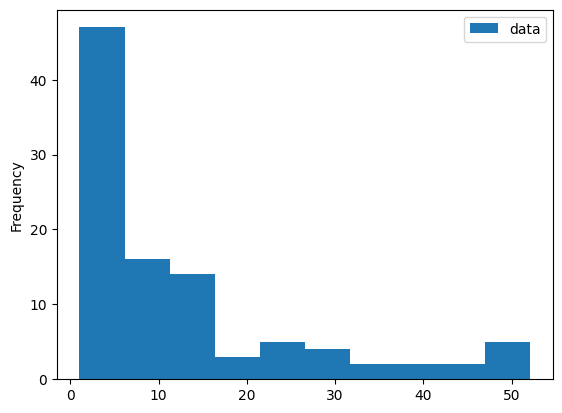

In [6]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

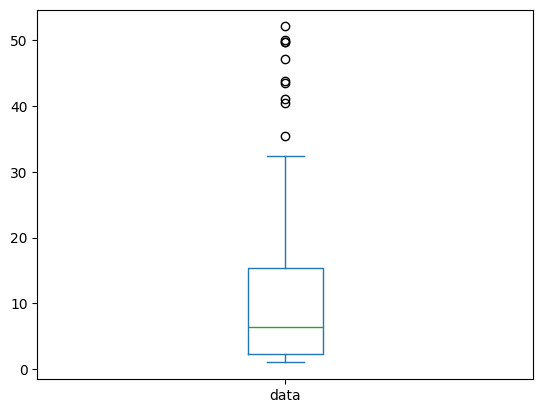

In [7]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

Loading from Beth: C:\Users\alexa\.cache\kagglehub\datasets\katehighnam\beth-dataset\versions\3\labelled_2021may-ip-10-100-1-105-dns.csv
Loading from Beth: C:\Users\alexa\.cache\kagglehub\datasets\katehighnam\beth-dataset\versions\3\labelled_2021may-ip-10-100-1-186-dns.csv
Loading from Beth: C:\Users\alexa\.cache\kagglehub\datasets\katehighnam\beth-dataset\versions\3\labelled_2021may-ip-10-100-1-26-dns.csv
Loading from Beth: C:\Users\alexa\.cache\kagglehub\datasets\katehighnam\beth-dataset\versions\3\labelled_2021may-ip-10-100-1-4-dns.csv
Loading from Beth: C:\Users\alexa\.cache\kagglehub\datasets\katehighnam\beth-dataset\versions\3\labelled_2021may-ip-10-100-1-95-dns.csv
Loading from Beth: C:\Users\alexa\.cache\kagglehub\datasets\katehighnam\beth-dataset\versions\3\labelled_2021may-ubuntu-dns.csv
Loading from Cribo: C:\Users\alexa\.cache\kagglehub\datasets\teamincribo\cyber-security-attacks\versions\20\cybersecurity_attacks.csv
Null values:
 Action Taken                259
Alerts/Warn

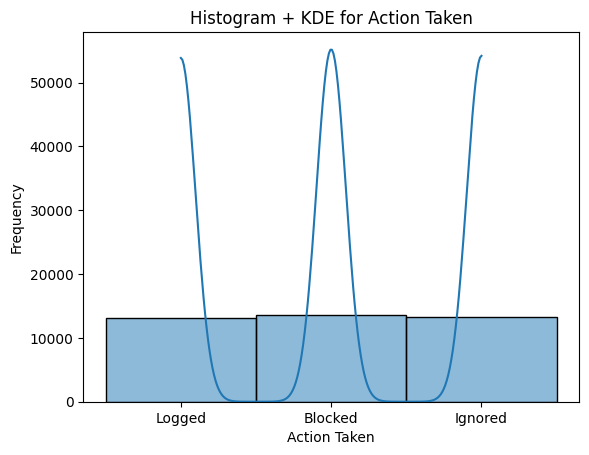

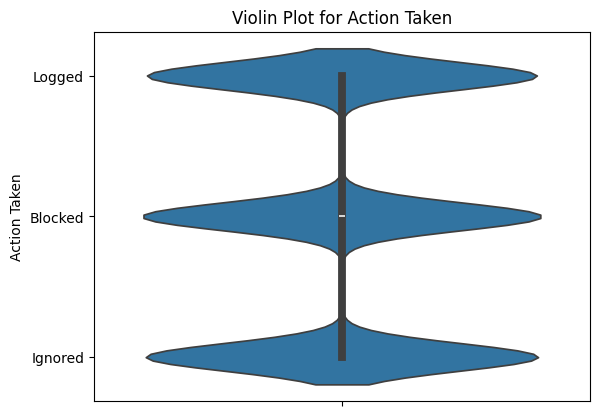

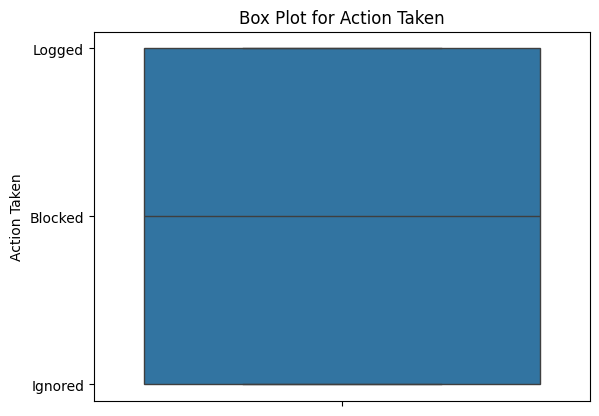

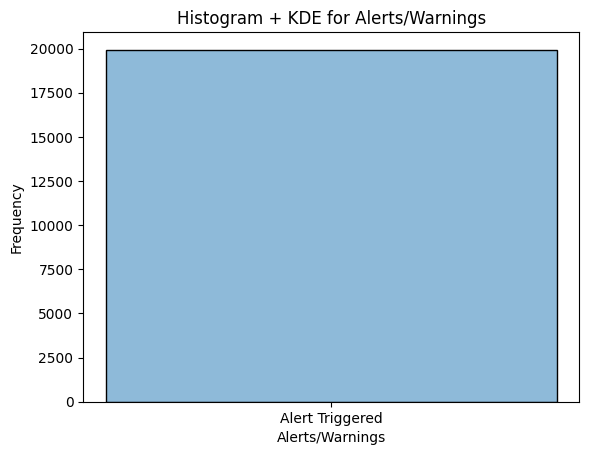

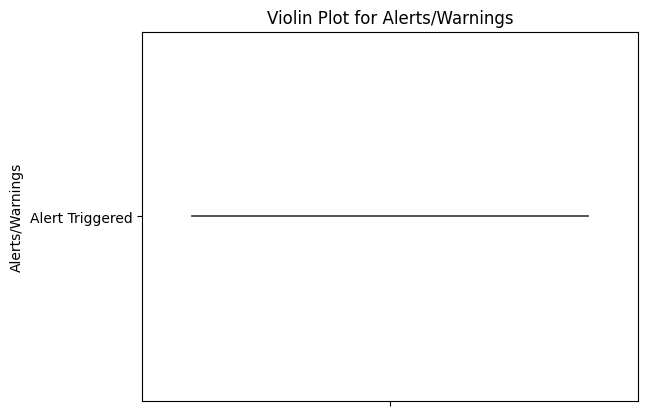

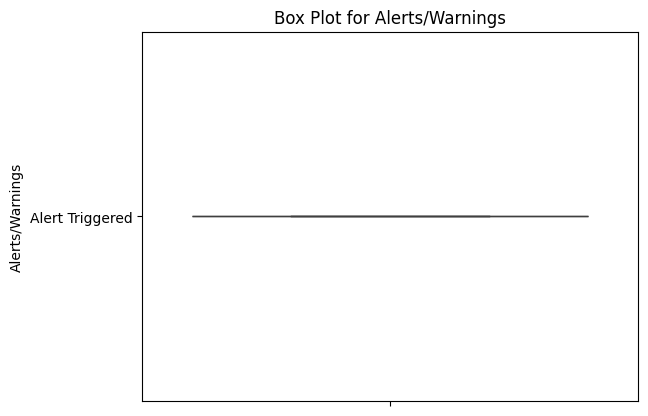

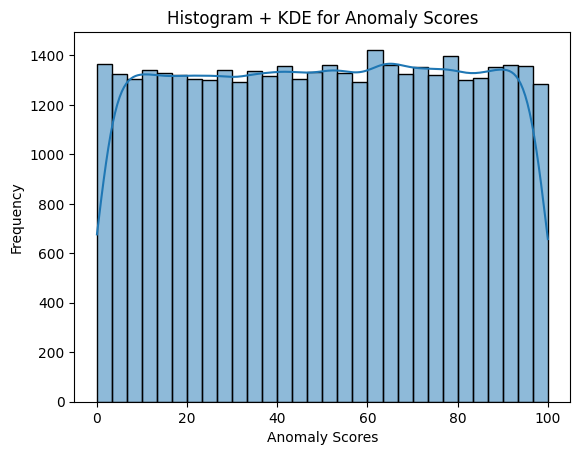

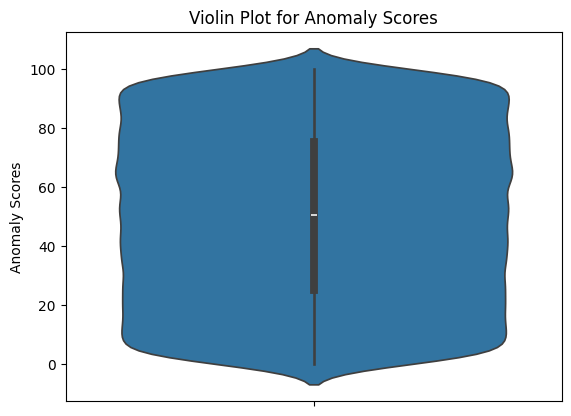

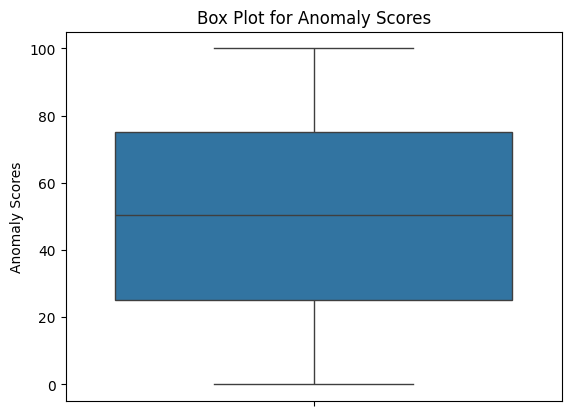

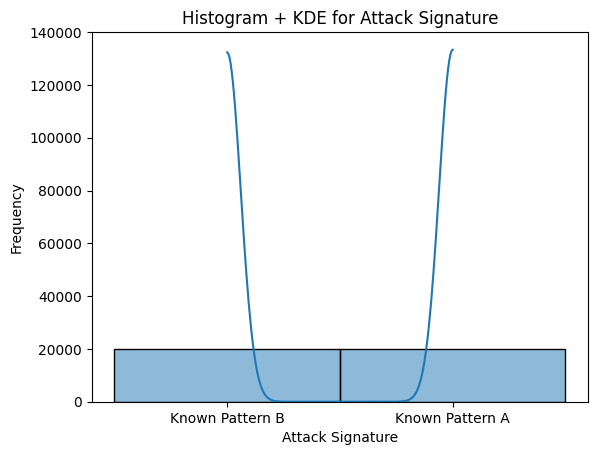

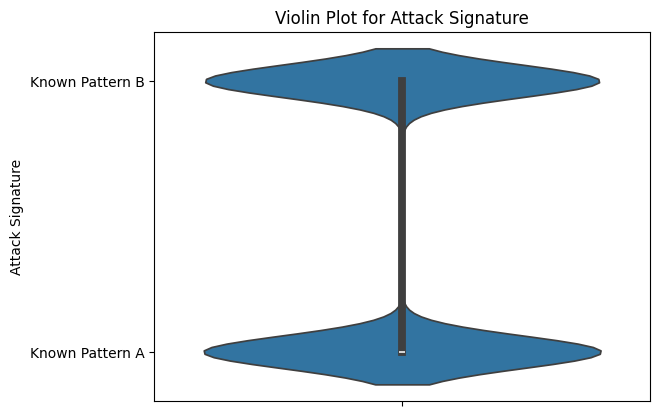

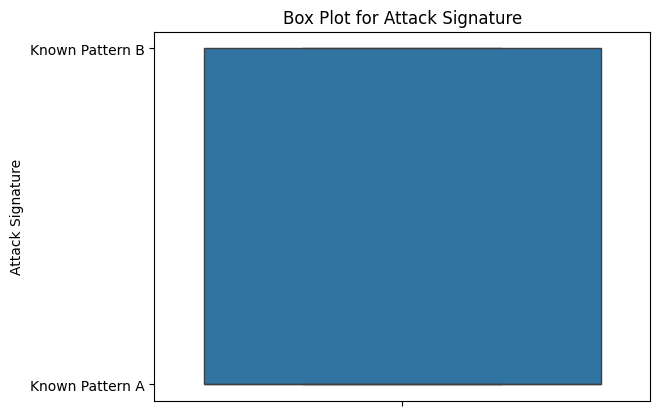

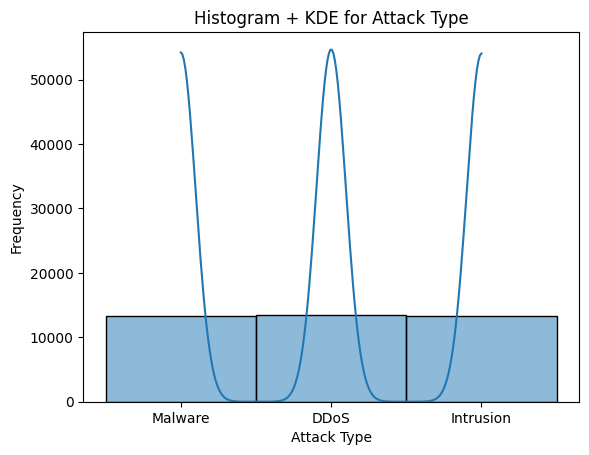

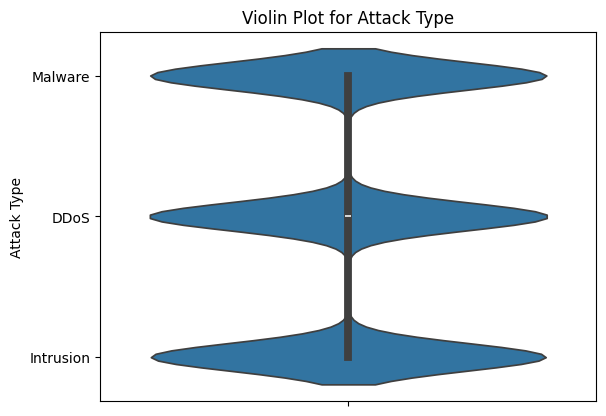

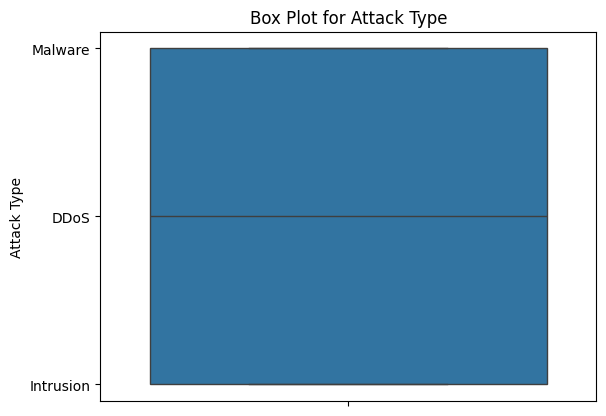

In [11]:
import kagglehub 
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

# --- Download both datasets ---
beth_dataset = kagglehub.dataset_download("katehighnam/beth-dataset")
cribo_dataset = kagglehub.dataset_download("teamincribo/cyber-security-attacks")

# --- Load DNS-related CSVs from Beth dataset ---
dns_dataset = []
for root, dirs, files in os.walk(beth_dataset):
    for file in files:
        if file.endswith(".csv") and "dns" in file.lower():
            file_path = os.path.join(root, file)
            print(f"Loading from Beth: {file_path}")
            df = pd.read_csv(file_path)
            dns_dataset.append(df)
combined_dns = pd.concat(dns_dataset, ignore_index=True)

# --- Load all CSVs from Cribo dataset ---
cribo_dataframes = []
for root, dirs, files in os.walk(cribo_dataset):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)
            print(f"Loading from Cribo: {file_path}")
            df = pd.read_csv(file_path)
            cribo_dataframes.append(df)
combined_cribo = pd.concat(cribo_dataframes, ignore_index=True)

# --- Align columns across both datasets ---
dns_cols = set(combined_dns.columns)
cribo_cols = set(combined_cribo.columns)
all_cols = sorted(list(dns_cols.union(cribo_cols)))

# Add missing columns to each DataFrame
for col in all_cols:
    if col not in combined_dns.columns:
        combined_dns[col] = np.nan
    if col not in combined_cribo.columns:
        combined_cribo[col] = np.nan

# Reorder columns to match
combined_dns = combined_dns[all_cols]
combined_cribo = combined_cribo[all_cols]

# --- Combine both datasets ---
combined_all = pd.concat([combined_dns, combined_cribo], ignore_index=True)

# --- Encode categorical columns ---
cat_cols = combined_all.select_dtypes(include=["object", "category"]).columns
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
combined_all[cat_cols] = encoder.fit_transform(combined_all[cat_cols])

# --- Drop duplicates, check nulls ---
combined_all.drop_duplicates(inplace=True)
print("Null values:\n", combined_all.isnull().sum())
print("Combined Dataset Info:")
combined_all.info()

# --- Save the combined dataset ---
combined_all.to_csv("combined_beth_cribo_dataset.csv", index=False)

# Identify numeric and categorical columns
numeric_cols = combined_all.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = combined_all.select_dtypes(include=['object', 'category']).columns.tolist()

# --- Summary Statistics ---
means = combined_all[numeric_cols].mean()
medians = combined_all[numeric_cols].median()
modes = combined_all[numeric_cols].mode().iloc[0]

print("\n--- Summary Statistics ---")
print("Means:\n", means)
print("Medians:\n", medians)
print("Modes:\n", modes)

# --- Histograms, KDE, Violin, Box Plots for Numeric Columns ---
for col in numeric_cols[:5]:  # Adjust range as needed
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Histogram + KDE for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    plt.figure()
    sns.violinplot(y=df[col].dropna())
    plt.title(f"Violin Plot for {col}")
    plt.ylabel(col)
    plt.show()

    plt.figure()
    sns.boxplot(y=df[col].dropna())
    plt.title(f"Box Plot for {col}")
    plt.ylabel(col)
    plt.show()

# --- Bar Plots for Categorical Columns ---
for col in categorical_cols[:3]:  # Adjust range as needed
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Plot for {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- Grouped Histogram Example ---
# Only runs if both a categorical and numeric column exist
if categorical_cols and numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=numeric_cols[0], hue=categorical_cols[0], multiple="stack", bins=30)
    plt.title(f"Grouped Histogram of {numeric_cols[0]} by {categorical_cols[0]}")
    plt.xlabel(numeric_cols[0])
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()